# K-Means Clustering (Survival)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


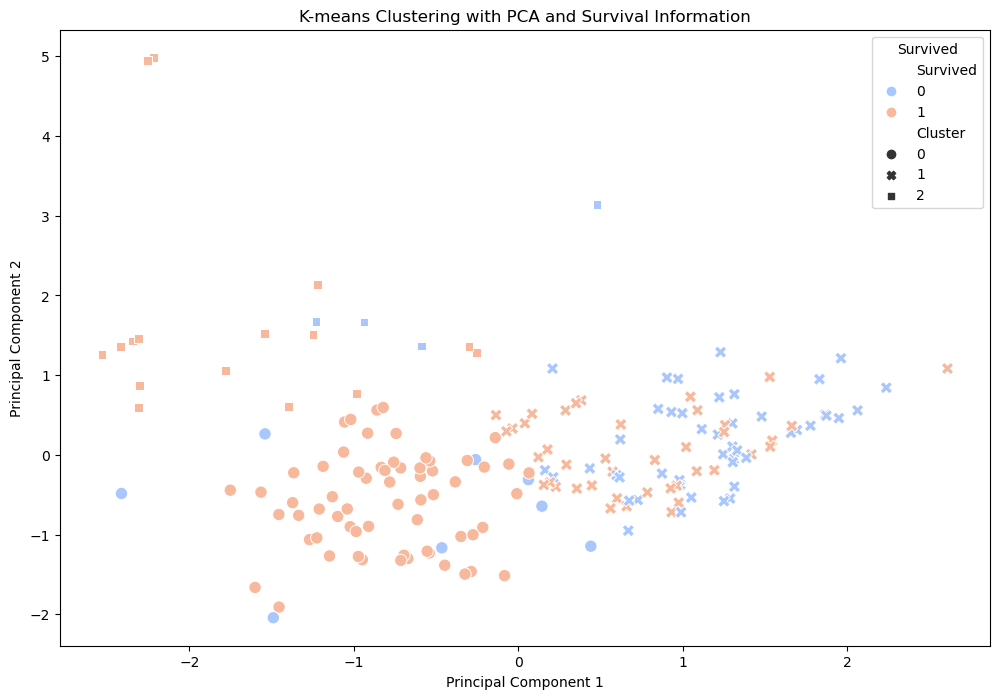

Explained Variance Ratio of PCA Components: [0.42519702 0.30505726]
Cluster Centers (PCA space): [[-0.77804761 -0.60528947]
 [ 0.96099735  0.10210729]
 [-1.48461429  1.74982377]]
Cluster Centers (original scaled space): [[-0.76764502 -0.12146394 -0.60638359]
 [ 0.62083382 -0.39298017  0.62775294]
 [ 0.00815213  2.21175413 -0.61158812]]
Cluster Centers (original feature space): [[2.36983467e+01 6.94343314e+01 2.16155779e-01]
 [4.53600948e+01 4.87613691e+01 8.32772442e-01]
 [3.58016081e+01 2.47083120e+02 2.13555418e-01]]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display the first few rows of the dataset
print(df.head())

# Drop rows with missing values (if applicable)
df = df.dropna()

# Select features for clustering (you can customize based on your dataset)
features = ['Age', 'Fare']

# If categorical columns need encoding, apply LabelEncoder
if 'Sex' in df.columns:
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
    features.append('Sex')

# Add 'Survived' column to the dataset for analysis
if 'Survived' in df.columns:
    df['Survived'] = df['Survived']  # Keep 'Survived' as is for visualization

# Prepare features for clustering
x = df[features]

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
x_pca = pca.fit_transform(x_scaled)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_pca)

# Visualize the clusters with survival information
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    hue=df['Survived'],  # Use 'Survived' for color coding
    style=df['Cluster'],  # Use clusters for marker style
    palette='coolwarm',
    s=80
)
plt.title('K-means Clustering with PCA and Survival Information')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Survived')
plt.show()

# Display the explained variance ratio of PCA components
print("Explained Variance Ratio of PCA Components:", pca.explained_variance_ratio_)

# Display the cluster centers in PCA-transformed space
centroids = kmeans.cluster_centers_
print("Cluster Centers (PCA space):", centroids)

# Optional: Reverse PCA transformation of centroids to original scaled space
centroids_original_scaled = pca.inverse_transform(centroids)
print("Cluster Centers (original scaled space):", centroids_original_scaled)

# Optional: Reverse scaling of centroids for interpretation in original feature space
centroids_original = scaler.inverse_transform(centroids_original_scaled)
print("Cluster Centers (original feature space):", centroids_original)